<h2 style='color:red' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

C:\Users\anand\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 527s 3us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

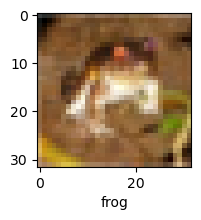

In [10]:
plot_sample(X_train, y_train, 0)

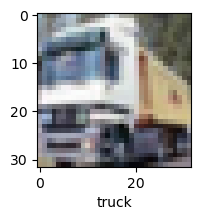

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:blue">Normalizing the training data</h4>

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:blue">Build simple artificial neural network for image classification</h4>

In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.8124 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6237 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5419 - accuracy: 0.4552
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4817 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4303 - accuracy: 0.4977


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.24      0.37      1000
           1       0.27      0.90      0.41      1000
           2       0.48      0.13      0.21      1000
           3       0.25      0.61      0.35      1000
           4       0.65      0.20      0.31      1000
           5       0.40      0.30      0.34      1000
           6       0.52      0.43      0.47      1000
           7       0.65      0.41      0.50      1000
           8       0.74      0.30      0.43      1000
           9       0.48      0.31      0.38      1000

    accuracy                           0.39     10000
   macro avg       0.52      0.39      0.38     10000
weighted avg       0.52      0.39      0.38     10000



<h4 style="color:blue">Now let us build a convolutional neural network to train our images</h4>

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.4527 - accuracy: 0.4801
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1083 - accuracy: 0.6106
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9702 - accuracy: 0.6611
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8874 - accuracy: 0.6898
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8223 - accuracy: 0.7136
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7692 - accuracy: 0.7314
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7222 - accuracy: 0.7489
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6751 - accuracy: 0.7650
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6362 - accuracy: 0.7769
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.0189 - accuracy: 0.6747


[1.0188754796981812, 0.6747000217437744]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[5.0042928e-03, 2.0788792e-04, 6.7543588e-03, 6.9695330e-01,
        6.6269618e-05, 2.4039708e-01, 5.0365370e-02, 2.1692795e-06,
        2.4472631e-04, 4.5476927e-06],
       [5.5270304e-04, 2.5611299e-01, 5.8426000e-08, 1.6193943e-09,
        4.4161323e-09, 8.3350774e-12, 4.1755273e-11, 7.6466099e-12,
        7.4332774e-01, 6.5843465e-06],
       [6.8705580e-03, 8.3196446e-02, 3.7163496e-04, 1.7591822e-04,
        1.3451275e-04, 3.4248733e-05, 8.0919870e-07, 2.7377175e-05,
        9.0885794e-01, 3.3051238e-04],
       [9.9855822e-01, 5.6192897e-05, 5.1676785e-04, 8.2529978e-06,
        3.3369754e-04, 3.6848313e-08, 7.7129550e-07, 2.9329585e-06,
        5.2208558e-04, 1.0448713e-06],
       [2.6707829e-08, 3.8978450e-07, 8.7680537e-03, 4.4555441e-02,
        6.4062644e-03, 7.5540663e-04, 9.3951297e-01, 9.0866297e-07,
        4.4474731e-07, 4.6726574e-09]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

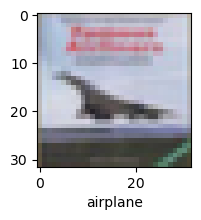

In [25]:
plot_sample(X_test, y_test,3)

In [26]:
classes[y_classes[3]]

'airplane'

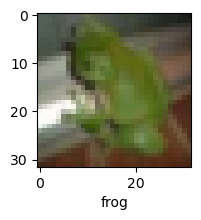

In [41]:
plot_sample(X_test,y_test,7)

In [42]:
classes[y_classes[7]]

'cat'

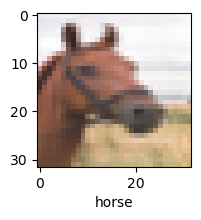

In [43]:
plot_sample(X_test,y_test,99)

In [44]:
classes[y_classes[99]]

'horse'

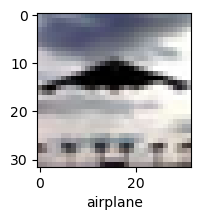

In [47]:
plot_sample(X_test,y_test,111)

In [46]:
classes[y_classes[111]]

'airplane'

In [45]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.83      0.71      1000
           1       0.66      0.92      0.77      1000
           2       0.56      0.60      0.58      1000
           3       0.53      0.46      0.49      1000
           4       0.68      0.55      0.60      1000
           5       0.65      0.52      0.58      1000
           6       0.75      0.77      0.76      1000
           7       0.71      0.76      0.73      1000
           8       0.84      0.69      0.76      1000
           9       0.82      0.65      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [49]:
pip install tensorflow numpy pillow


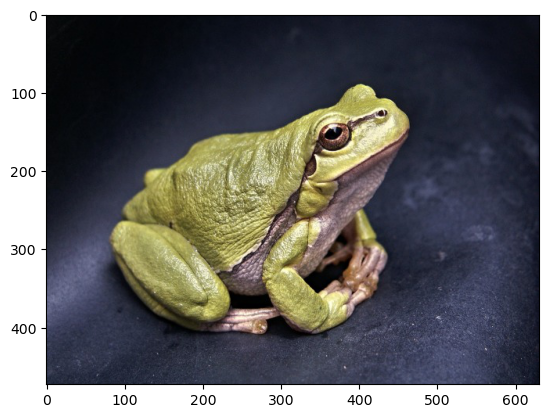

In [58]:
image_path = "C:/Users/anand/Downloads/frog.jpg"  
image=Image.open(image_path)
plt.imshow(image)

In [55]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image

image_path = "C:/Users/anand/Downloads/frog.jpg"  
img = image.load_img(image_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's expected input shape
img_array /= 255.0  # Normalize pixel values (assuming the model was trained with normalized data)

# Make predictions
predictions = cnn.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(predictions[0])

# Print or use the predicted class label
print("Predicted Class:", classes[predicted_class])


1/1 [==============================] - 0s 47ms/step
Predicted Class: frog


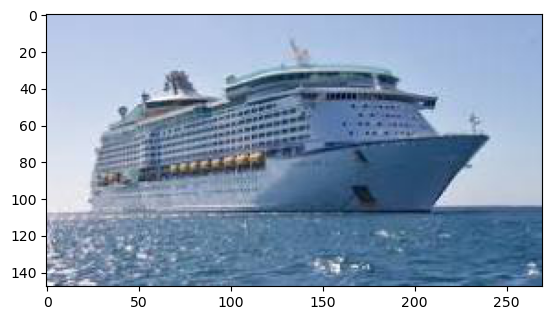

In [61]:
image_path1 = "C:/Users/anand/Downloads/ship.jpeg"
image1=Image.open(image_path1)
plt.imshow(image1)

In [62]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image

image_path = "C:/Users/anand/Downloads/ship.jpeg"
img = image.load_img(image_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's expected input shape
img_array /= 255.0  # Normalize pixel values (assuming the model was trained with normalized data)

# Make predictions
predictions = cnn.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(predictions[0])

# Print or use the predicted class label
print("Predicted Class:", classes[predicted_class])


1/1 [==============================] - 0s 83ms/step
Predicted Class: ship


In [66]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               